|   iter    |  target   |     A     |     B     |
-------------------------------------------------
| 1         | -0.09139  | 0.003745  | 0.9507    |
| 2         | -0.0514   | 0.00732   | 0.5987    |
| 3         | -0.000496 | 0.00156   | 0.156     |
| 4         | -0.007955 | 0.0005808 | 0.8662    |
| 5         | -0.06213  | 0.006011  | 0.7081    |
| 6         | -0.0027   | 0.0002058 | 0.9699    |
| 7         | -0.01372  | 0.008324  | 0.2123    |
| 8         | -0.000396 | 0.001818  | 0.1834    |
| 9         | -0.01455  | 0.003042  | 0.5248    |
| 10        | -0.008286 | 0.004319  | 0.2912    |
| 11        | -0.007954 | 0.004192  | 0.2912    |
| 12        | -0.000582 | 0.002027  | 0.1696    |
| 13        | -0.008715 | 0.0004089 | 0.9852    |
| 14        | -0.0026   | 0.0001737 | 0.2741    |
| 15        | -0.01088  | 0.00883   | 0.1382    |
| 16        | -0.002244 | 0.000341  | 0.2539    |
| 17        | -0.0177   | 0.009486  | 0.2372    |
| 18        | -0.003012 | 5.834e-06 | 0.3126    |


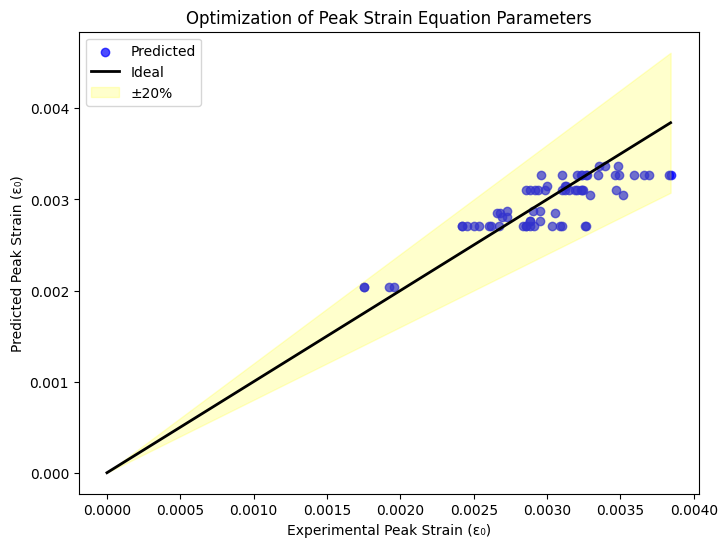

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt

# Experimental data
data = pd.DataFrame({
    'f_cg': [18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 18.8,
             18.8, 18.8, 18.8, 18.8, 18.8, 18.8, 32.5, 32.5, 32.5, 32.5, 32.5, 32.5,
             32.5, 32.5, 32.5, 32.5, 32.5, 32.5, 32.5, 32.5, 40.3, 40.3, 40.3, 40.3,
             40.3, 40.3, 40.3, 40.3, 40.3, 40.3, 40.3, 40.3, 40.3, 40.3, 40.3, 30.34,
             30.34, 21.9, 21.9, 23.2, 23.2, 23.2, 6, 6, 6, 6, 20.4, 20.4, 20.4, 23.9,
             23.9, 23.9, 34.7, 34.7, 34.7, 45, 45, 45],
    'epsilon_0': [0.002505, 0.002858, 0.002911, 0.002835, 0.003258, 0.003033, 0.003268,
                  0.003101, 0.002621, 0.003086, 0.002885, 0.002854, 0.002457, 0.002670,
                  0.002418, 0.002417, 0.002537, 0.002606, 0.002855, 0.002882, 0.003104,
                  0.002984, 0.003471, 0.003232, 0.003152, 0.003235, 0.003201, 0.003119,
                  0.003244, 0.003190, 0.002936, 0.002915, 0.003101, 0.002957, 0.003232,
                  0.003345, 0.003490, 0.003594, 0.003828, 0.003842, 0.003694, 0.003664,
                  0.003463, 0.003239, 0.003264, 0.003271, 0.003204, 0.003290, 0.003517,
                  0.002693, 0.002727, 0.002679, 0.002660, 0.003056, 0.001755, 0.001954,
                  0.001925, 0.001751, 0.002885, 0.002950, 0.002885, 0.002906, 0.002952,
                  0.002729, 0.003130, 0.002997, 0.003125, 0.003481, 0.003395, 0.003355]
})


def predicted_epsilon_0(params, f_cg):
    A, B = params
    return A * (f_cg ** B)


def loss_function(A, B):
    f_cg = data['f_cg'].values
    epsilon_0_exp = data['epsilon_0'].values
    epsilon_0_pred = predicted_epsilon_0([A, B], f_cg)
    return -np.sqrt(mean_squared_error(epsilon_0_exp, epsilon_0_pred))  


pbounds = {'A': (0.0, 0.01), 'B': (0.0, 1.0)}
optimizer = BayesianOptimization(f=loss_function, pbounds=pbounds, random_state=42)
optimizer.maximize(init_points=10, n_iter=50)

best_params = optimizer.max['params']
A_opt, B_opt = best_params['A'], best_params['B']

f_cg = data['f_cg'].values
epsilon_0_exp = data['epsilon_0'].values
epsilon_0_pred = predicted_epsilon_0([A_opt, B_opt], f_cg)
overall_rmse = np.sqrt(mean_squared_error(epsilon_0_exp, epsilon_0_pred))

print(f"Optimized Parameters:\n A = {A_opt}, B = {B_opt}")
print(f"Overall RMSE: {overall_rmse}")
